<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

In [2]:
link = "/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Controles/Copia de sensor lb.csv"
dataset = pd.read_csv(link, sep = ";")
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187


In [4]:
dataset = dataset.query("Activo_id <= 20")
dataset.shape

(4168, 25)

Generando la variable categórica

In [7]:
dataset['vida'] = 100* dataset['ciclo']/ dataset.max_ciclo
dataset['y_target'] = np.where(dataset.vida < 80,0,1)
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down,vida,y_target
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0.520833,0
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,1.041667,0
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,1.562500,0
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,2.083333,0
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,2.604167,0


In [8]:
col_eliminar = ["max_ciclo","count_down","vida"]
dataset = dataset.drop(col_eliminar, axis = 1)
dataset.shape

(4168, 24)

Escalamiento de variables

In [10]:
sc_X = StandardScaler()
dataset.iloc[:,1:-1] = sc_X.fit_transform(dataset.iloc[:,1:-1])

In [11]:
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,y_target
0,1,-1.612800,0.0,-1.579303,-0.075330,-0.794184,-1.0,0.169198,0.964259,-0.363720,-0.820198,-1.0,-0.164209,0.209543,-0.863743,-0.338885,-0.498117,-1.0,-0.698937,0.0,0.0,1.228083,1.088461,0
1,1,-1.597791,0.0,-0.947622,0.258006,-0.522921,-1.0,0.169198,0.306651,-0.628544,-0.900965,-1.0,-0.092598,1.017273,-0.209849,-0.654198,-0.176474,-1.0,-0.698937,0.0,0.0,0.906186,1.129729,0
2,1,-1.582781,0.0,-0.564785,-0.344200,-0.409717,-1.0,0.169198,0.856454,-0.098896,-0.563036,-1.0,-0.880318,1.199663,-0.732964,-0.577250,-0.542572,-1.0,-1.950299,0.0,0.0,0.637938,0.417410,0
3,1,-1.567772,0.0,-0.564785,-1.161818,-0.658552,-1.0,0.169198,1.061283,0.298340,-0.694855,-1.0,-1.381594,1.772891,-0.079070,-0.550716,-1.839604,-1.0,-0.698937,0.0,0.0,0.262391,0.683857,0
4,1,-1.552762,0.0,-0.526502,-1.152384,-0.193988,-1.0,0.169198,0.576162,-0.363720,-0.478840,-1.0,-0.844512,0.900022,-0.602185,-0.552042,-0.239234,-1.0,-0.073256,0.0,0.0,0.369690,0.957481,0


Matriz característica

In [22]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

(4168,)

PCA

In [23]:
pca = PCA(n_components= 2)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.60158806, 0.14415069])

División en conjuntos de datos

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0) 

Modelo de clasificación: Support Vector Machine

In [26]:
modelo_clasificacion = SVC(kernel = "rbf", random_state = 0)
modelo_clasificacion.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
# Estableciendo una predicción
y_pred = modelo_clasificacion.predict(X_test)

Matriz de confusión

In [31]:
matriz_confusion = confusion_matrix(Y_test, y_pred)
print(matriz_confusion)

[[649  12]
 [ 13 160]]


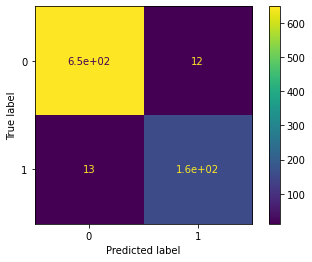

In [33]:
plot_confusion_matrix(modelo_clasificacion, X = X_test, y_true= Y_test)

In [34]:
accuracy_score(Y_test, y_pred)

0.9700239808153477

K-fold corss validation

In [36]:
accuracies = cross_val_score(modelo_clasificacion,X_train, Y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.9664095232957507
0.007179495756862527


Visualización de frontera de decisiones

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


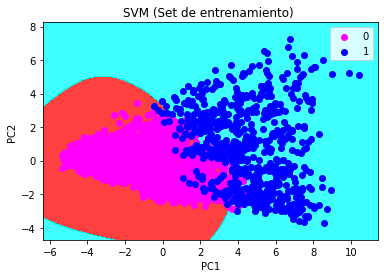

In [39]:
# Visualizacion del modelo según los datos de entrenamiento
X_set, Y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,modelo_clasificacion.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("SVM (Set de entrenamiento) ") 
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


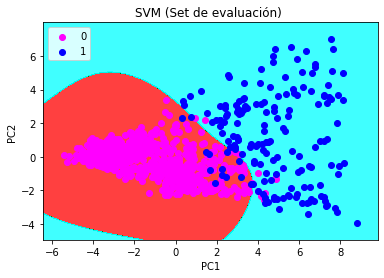

In [40]:
# Visualizacion del modelo según los datos de testing
x_set, y_set = X_test, Y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,modelo_clasificacion.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("SVM (Set de evaluación) ") 
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

In [41]:
accuracies

array([0.95508982, 0.96107784, 0.96107784, 0.97904192, 0.97297297,
       0.95795796, 0.96996997, 0.97297297, 0.96696697, 0.96696697])